Created by: Manideep Elasagaram



Competition: Multi-Class Prediction of Obesity Risk

# IMPORTING REQUIRED PACKAGES

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from dmba import regressionSummary, exhaustive_search
from dmba import classificationSummary, gainsChart, liftChart
from dmba import plotDecisionTree, classificationSummary, regressionSummary

from mord import LogisticIT
from math import sqrt


import statsmodels.api as sm
import statsmodels.formula.api as sm


import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline

no display found. Using non-interactive Agg backend


In [2]:
#Creating dataframe from the given data set
Obesity_df = pd.read_csv("train.csv")

In [3]:
#Dropping 'id' as it's and independent feature and doesn't add any value
Obesity_df=Obesity_df.drop(columns="id")
Obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [4]:
#Dimensions of the data frame 
Obesity_df.shape

(20758, 17)

In [5]:
#Display the first 20 column of the dataframe
Obesity_df.head(20)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
#Total column names
Obesity_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
#converting all object datatypes to categorical datatypes
Obesity_df['Gender'] = Obesity_df['Gender'].astype('category')
Obesity_df['family_history_with_overweight'] = Obesity_df['family_history_with_overweight'].astype('category')
Obesity_df['FAVC'] = Obesity_df['FAVC'].astype('category')
Obesity_df['CAEC'] = Obesity_df['CAEC'].astype('category')
Obesity_df['SMOKE'] = Obesity_df['SMOKE'].astype('category')
Obesity_df['SCC'] = Obesity_df['SCC'].astype('category')
Obesity_df['CALC'] = Obesity_df['CALC'].astype('category')
Obesity_df['MTRANS'] = Obesity_df['MTRANS'].astype('category')
Obesity_df['NObeyesdad'] = Obesity_df['NObeyesdad'].astype('category')

# HISTOGRAM

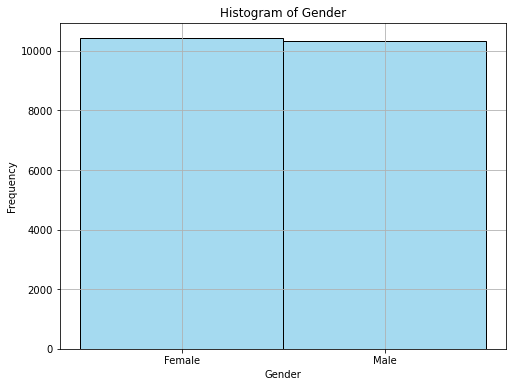

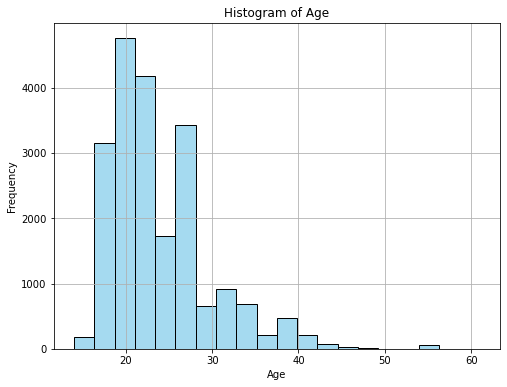

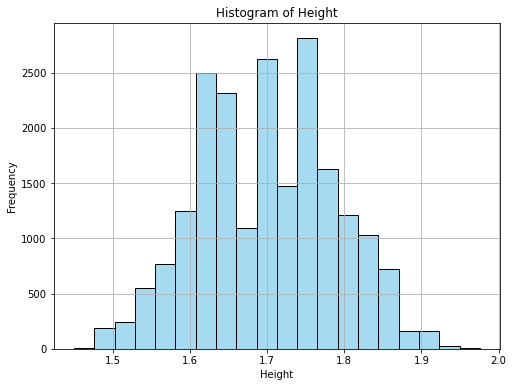

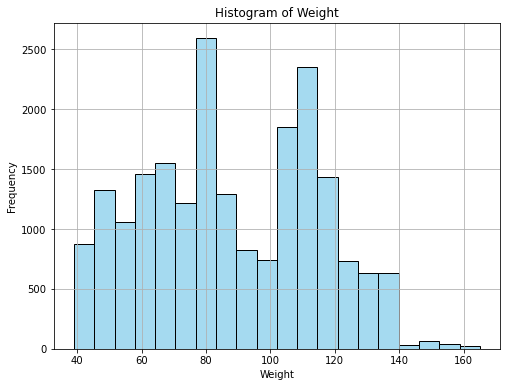

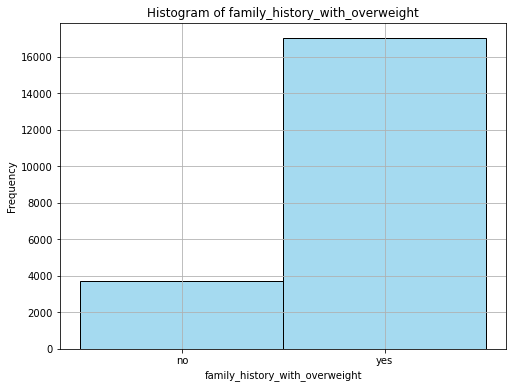

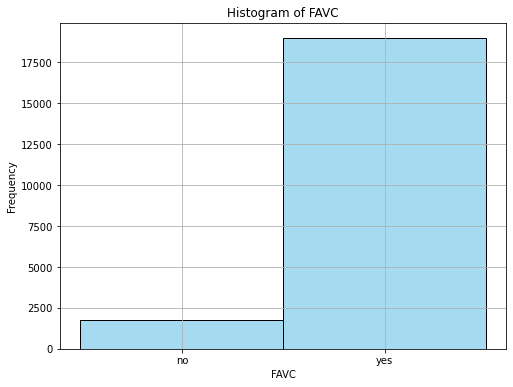

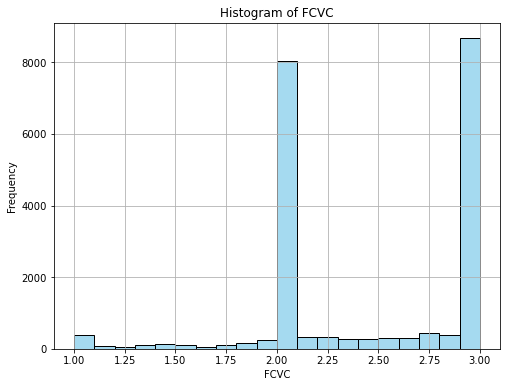

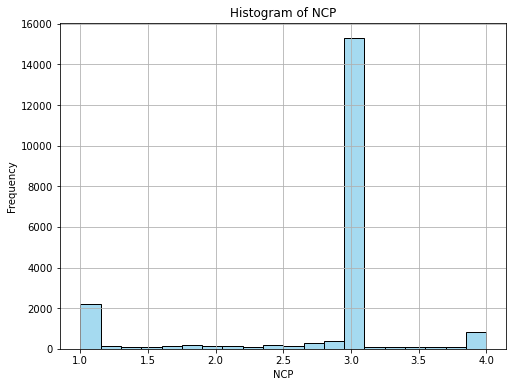

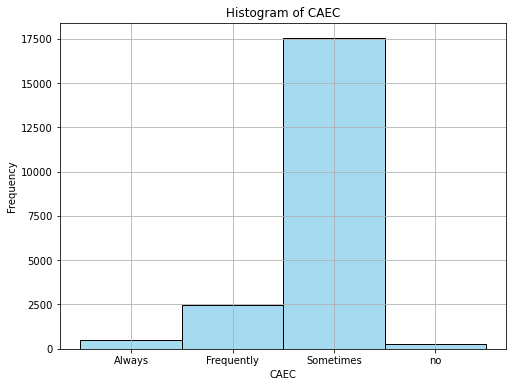

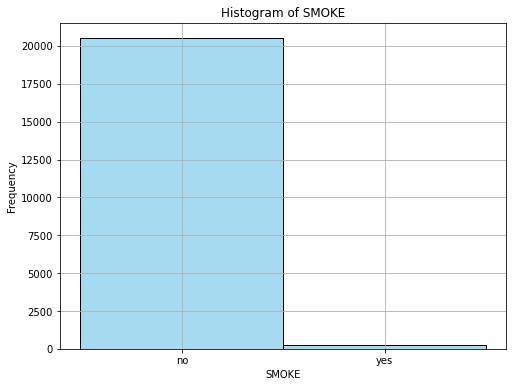

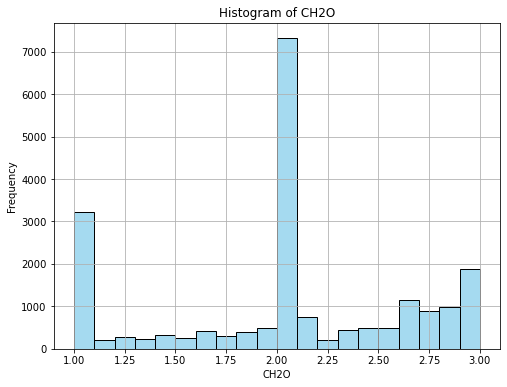

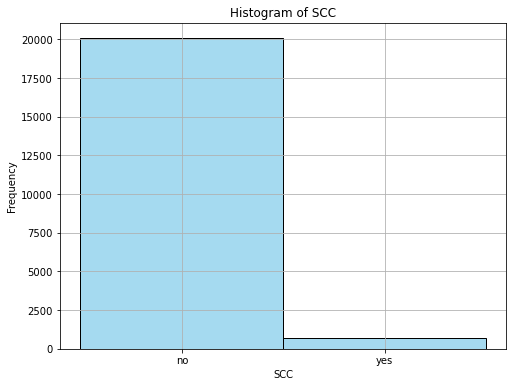

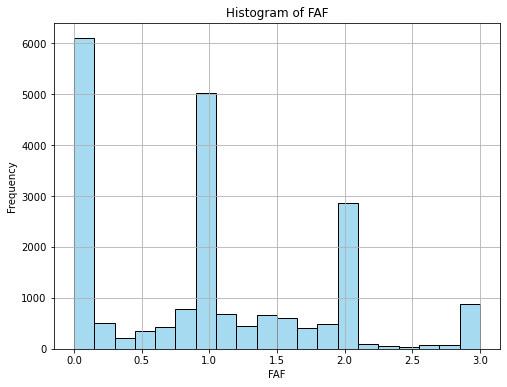

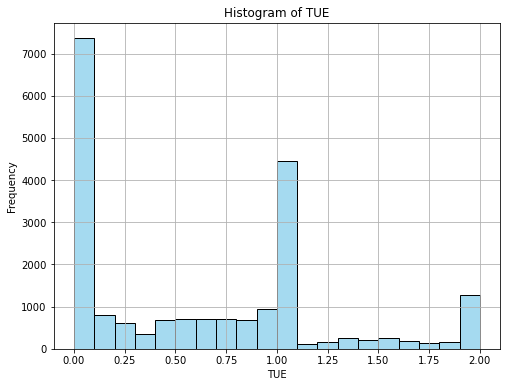

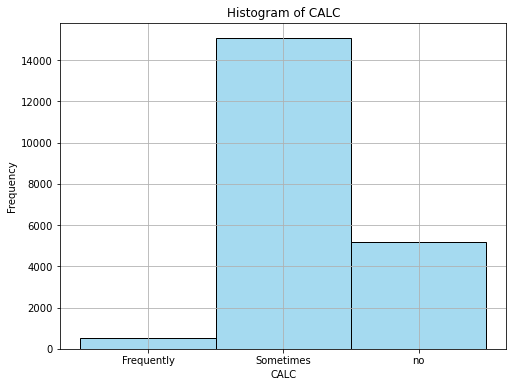

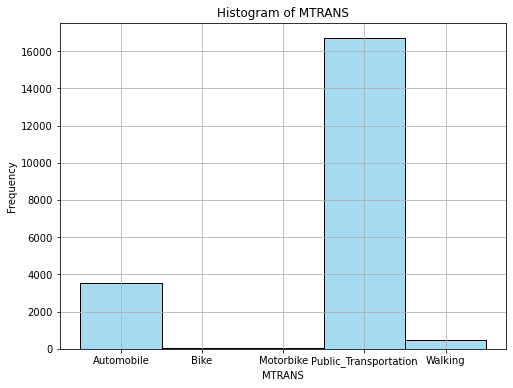

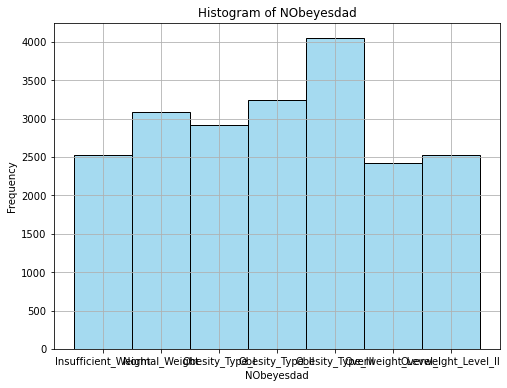

In [8]:

#Using Seaborn for plotting histograms for each numerical column
for column in  Obesity_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=Obesity_df, x=column, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    

# HEATMAP 

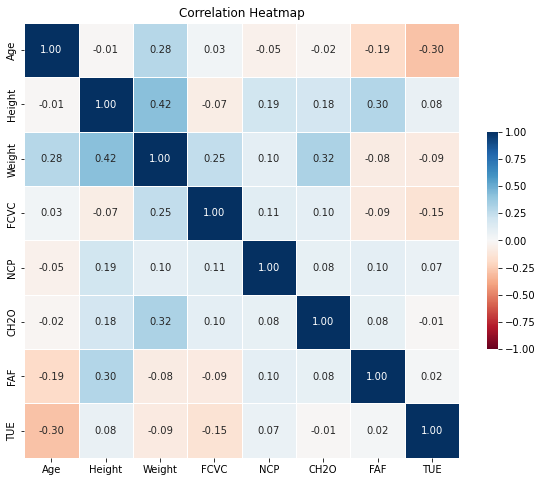

In [9]:
# Calculate the correlation matrix
corr_matrix = Obesity_df.corr()
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()

# BOXPLOT

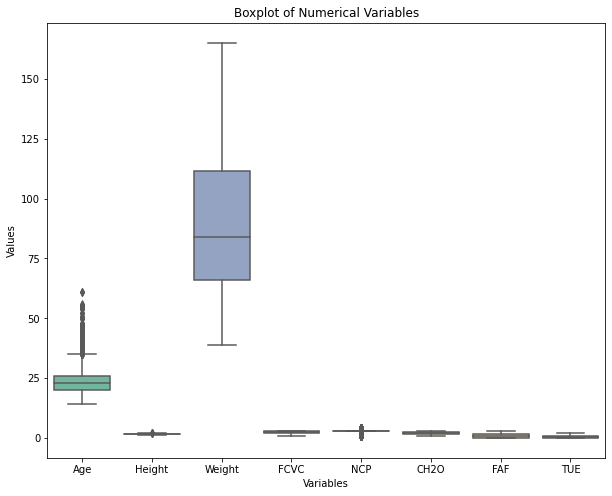

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

sns.boxplot(data=Obesity_df, orient='v', palette='Set2')
plt.title('Boxplot of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

# SCATTERPLOT

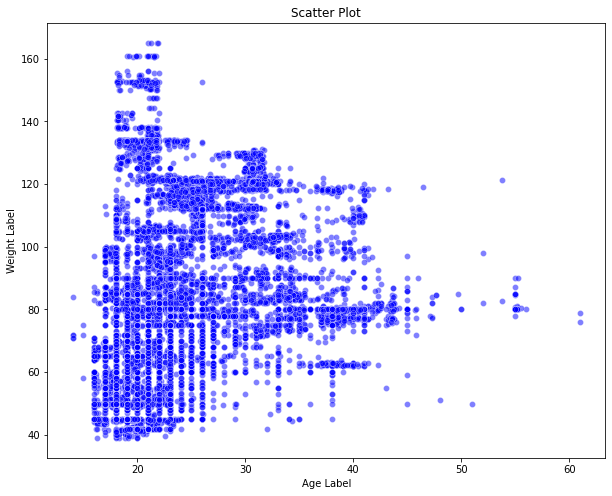

In [11]:
# Set up the figure and axis
plt.figure(figsize=(10, 8))
sns.scatterplot(data=Obesity_df, x='Age', y='Weight', color='blue', alpha=0.5)  # Adjust 'x_column' and 'y_column' accordingly
plt.title('Scatter Plot')
plt.xlabel('Age Label')
plt.ylabel('Weight Label')
plt.show()

# CREATING DUMMIES


In [12]:
categorical_cols = Obesity_df.select_dtypes(include=['object']).columns

#Exclude column "B" out of the category column list.
categorical_cols_except_B = [c for c in Obesity_df if c != "NObeyesdad" ]

# For all category columns other than "B," create dummy variables.
df_dummies = pd.get_dummies(Obesity_df[categorical_cols_except_B], prefix_sep='_',drop_first=False)

# Concatenate the dummy variables with the original DataFrame
df_final = pd.concat([Obesity_df.drop(columns=categorical_cols_except_B), df_dummies], axis=1)

In [13]:
#Final columns
df_final.columns

Index(['NObeyesdad', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

# DATA PARTITION


In [14]:
# Identify predictors and outcomes
predictors = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']
outcome = 'NObeyesdad'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4)
X = df_final[predictors]
y = df_final[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
#df_final[predictors]

# MODELLING TECHNIQUES

# RANDOM CLASSIFIER

In [16]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [17]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.8931)

       Prediction
Actual   0   1   2   3   4   5   6
     0 475  39   0   0   0   0   0
     1  33 526   0   0   0  24   9
     2   2   1 512  21   0  14  41
     3   0   0  12 597   0   0   4
     4   0   0   2   0 868   0   0
     5   5  59  12   0   0 329  71
     6   0  16  41   4   0  34 401


# DECISION TREE CLASSIFIER

In [18]:
#Develop trees
classTreeObesity1 = DecisionTreeClassifier(random_state=0, max_depth=3)
classTreeObesity1.fit(train_X, train_y)
classificationSummary(valid_y, classTreeObesity1.predict(valid_X))

Confusion Matrix (Accuracy 0.7240)

       Prediction
Actual   0   1   2   3   4   5   6
     0 421  92   0   0   0   0   1
     1 145 435   1   0   0   0  11
     2   2   9 283  58   0   0 239
     3   0   0  22 577   0   0  14
     4   0   0   1   0 868   0   1
     5   5 313   9   0   0   0 149
     6   0  50  20   4   0   0 422


# MLP CLASSIFIER

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500)
mlp.fit(train_X, train_y)
y_pred = mlp.predict(valid_X)
print("Accuracy:", accuracy_score(valid_y, y_pred))
print("Results of Classification:")
print(classification_report(valid_y, y_pred))

Accuracy: 0.8557321772639692
Results of Classification:
                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.96      0.90       514
      Normal_Weight       0.81      0.79      0.80       592
     Obesity_Type_I       0.91      0.75      0.83       591
    Obesity_Type_II       0.96      0.97      0.97       613
   Obesity_Type_III       1.00      1.00      1.00       870
 Overweight_Level_I       0.67      0.72      0.69       476
Overweight_Level_II       0.68      0.70      0.69       496

           accuracy                           0.86      4152
          macro avg       0.84      0.84      0.84      4152
       weighted avg       0.86      0.86      0.86      4152



# GRADIENT BOOSTING CLASSIFIER

In [20]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=51)
gbm.fit(train_X, train_y)
y_pred = gbm.predict(valid_X)
print("Accuracy:", accuracy_score(valid_y, y_pred))
print("Results of Classification:")
print(classification_report(valid_y, y_pred))

Accuracy: 0.9065510597302505
Results of Classification:
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.96      0.93       514
      Normal_Weight       0.88      0.87      0.88       592
     Obesity_Type_I       0.89      0.89      0.89       591
    Obesity_Type_II       0.97      0.97      0.97       613
   Obesity_Type_III       1.00      1.00      1.00       870
 Overweight_Level_I       0.83      0.76      0.79       476
Overweight_Level_II       0.79      0.81      0.80       496

           accuracy                           0.91      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.91      0.91      0.91      4152



Gradient Boosting Classifier shows the most accuracy

# TESTING

TESTING THE MODEL USING test.csv

In [21]:
import pandas as pd

# Load the test data
test_data = pd.read_csv("test.csv")

# Convert categorical columns to 'category' dtype
test_data['Gender'] = test_data['Gender'].astype('category')
test_data['family_history_with_overweight'] = test_data['family_history_with_overweight'].astype('category')
test_data['FAVC'] = test_data['FAVC'].astype('category')
test_data['CAEC'] = test_data['CAEC'].astype('category')
test_data['SMOKE'] = test_data['SMOKE'].astype('category')
test_data['SCC'] = test_data['SCC'].astype('category')
test_data['CALC'] = test_data['CALC'].astype('category')
test_data['MTRANS'] = test_data['MTRANS'].astype('category')



In [22]:
# Create dummy variables for categorical columns
test_data_dummies = pd.get_dummies(test_data, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'], drop_first=False)



In [23]:
test_data_dummies

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,20758,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,0,...,0,0,0,1,0,0,0,0,1,0
1,20759,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1,...,0,0,0,1,0,0,0,0,1,0
2,20760,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,1,...,0,0,0,1,0,0,0,0,1,0
3,20761,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,0,...,0,0,0,1,0,0,0,0,1,0
4,20762,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,0,...,0,0,0,1,0,0,0,0,1,0
13836,34594,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1,...,0,0,0,1,0,0,0,0,1,0
13837,34595,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,1,...,0,0,0,1,0,0,0,0,1,0
13838,34596,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0,...,0,0,0,0,1,0,0,0,1,0


In [24]:
#df_final.info()

In [25]:
#test_data_dummies.info()

In [26]:
#Dropping 'CALC_always' because it's part of the missing data from model training
#Drop the 'CALC_always' column if it exists
if 'CALC_always' in test_data_dummies.columns:
    df_final = test_data_dummies.drop(columns=['CALC_always'])

In [27]:
# Make sure the test data's column order corresponds to the training data's column order.
test_data_ordered = test_data_dummies[df_final.columns.drop('NObeyesdad')]  # Exclude the target variable

In [28]:
#Predictions using the trained GBM model
predictions = gbm.predict(test_data_ordered)

In [29]:
#Create a DataFrame for the predictions
predictions_df = pd.DataFrame({'id': test_data['id'], 'NObeyesdad': predictions})

In [30]:
#Save the predictions to a new CSV file
predictions_df.to_csv('Comp1_is6496.csv', index=False, columns=['id', 'NObeyesdad'])